# Classify Song Genres from Audio Data

# Importing the Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import operator
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import metrics
%matplotlib inline


# Loading the Dataset

In [2]:
data=pd.read_csv('fma-rock-vs-hiphop.csv',index_col=0)

# Data Visualization

In [3]:
data

bit_rate  comments        composer         date_created  \
track_id                                                            
135         256000         1             NaN  2008-11-26 01:43:26   
136         256000         1             NaN  2008-11-26 01:43:35   
151         192000         0             NaN  2008-11-26 01:44:55   
152         192000         0             NaN  2008-11-26 01:44:58   
153         256000         0  Arc and Sender  2008-11-26 01:45:00   
...            ...       ...             ...                  ...   
155063      320000         0             NaN  2017-03-24 19:40:43   
155064      320000         0             NaN  2017-03-24 19:40:44   
155065      320000         0             NaN  2017-03-24 19:40:45   
155066      320000         0             NaN  2017-03-24 19:40:47   
155247      320000         0         Fleslit  2017-03-29 01:40:28   

                date_recorded  duration  favorites genre_top          genres  \
track_id                                                                       
135       2008-11-26 00:00:00       837          0      Rock        [45, 58]   
136       2008-11-26 00:00:00       509          0      Rock        [45, 58]   
151                       NaN       192          0      Rock            [25]   
152                       NaN       193          0      Rock            [25]   
153       2008-11-26 00:00:00       405          5      Rock            [26]   
...                       ...       ...        ...       ...             ...   
155063                    NaN       283          3   Hip-Hop       [21, 811]   
155064                    NaN       250          2   Hip-Hop       [21, 811]   
155065                    NaN       219          3   Hip-Hop       [21, 811]   
155066                    NaN       252          6   Hip-Hop       [21, 811]   
155247                    NaN       211          3   Hip-Hop  [21, 539, 811]   

              genres_all information  interest language_code  \
track_id                                                       
135         [58, 12, 45]         NaN      2484            en   
136         [58, 12, 45]         NaN      1948            en   
151             [25, 12]         NaN       701            en   
152             [25, 12]         NaN       637            en   
153             [26, 12]         NaN       354            en   
...                  ...         ...       ...           ...   
155063         [811, 21]         NaN      1283           NaN   
155064         [811, 21]         NaN      1077           NaN   
155065         [811, 21]         NaN      1340           NaN   
155066         [811, 21]         NaN      2065           NaN   
155247    [811, 539, 21]         NaN      1379           NaN   

                                                    license  listens lyricist  \
track_id                                                                        
135       Attribution-NonCommercial-ShareAlike 3.0 Inter...     1832      NaN   
136       Attribution-NonCommercial-ShareAlike 3.0 Inter...     1498      NaN   
151       Attribution-NonCommercial-ShareAlike 3.0 Inter...      148      NaN   
152       Attribution-NonCommercial-ShareAlike 3.0 Inter...       98      NaN   
153       Attribution-NonCommercial-NoDerivatives (aka M...      424      NaN   
...                                                     ...      ...      ...   
155063                                          Attribution     1050      NaN   
155064                                          Attribution      858      NaN   
155065                                          Attribution     1142      NaN   
155066                                          Attribution     1474      NaN   
155247                                          Attribution     1025      NaN   

          number publisher                                               tags  \
track_id                                                                        
135            0      

In [4]:
data.shape


(17734, 20)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17734 entries, 135 to 155247
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   bit_rate       17734 non-null  int64 
 1   comments       17734 non-null  int64 
 2   composer       166 non-null    object
 3   date_created   17734 non-null  object
 4   date_recorded  1898 non-null   object
 5   duration       17734 non-null  int64 
 6   favorites      17734 non-null  int64 
 7   genre_top      17734 non-null  object
 8   genres         17734 non-null  object
 9   genres_all     17734 non-null  object
 10  information    482 non-null    object
 11  interest       17734 non-null  int64 
 12  language_code  4089 non-null   object
 13  license        17714 non-null  object
 14  listens        17734 non-null  int64 
 15  lyricist       53 non-null     object
 16  number         17734 non-null  int64 
 17  publisher      52 non-null     object
 18  tags           17734 no

In [6]:
data.head()

bit_rate  comments        composer         date_created  \
track_id                                                            
135         256000         1             NaN  2008-11-26 01:43:26   
136         256000         1             NaN  2008-11-26 01:43:35   
151         192000         0             NaN  2008-11-26 01:44:55   
152         192000         0             NaN  2008-11-26 01:44:58   
153         256000         0  Arc and Sender  2008-11-26 01:45:00   

                date_recorded  duration  favorites genre_top    genres  \
track_id                                                                 
135       2008-11-26 00:00:00       837          0      Rock  [45, 58]   
136       2008-11-26 00:00:00       509          0      Rock  [45, 58]   
151                       NaN       192          0      Rock      [25]   
152                       NaN       193          0      Rock      [25]   
153       2008-11-26 00:00:00       405          5      Rock      [26]   

            genres_all information  interest language_code  \
track_id                                                     
135       [58, 12, 45]         NaN      2484            en   
136       [58, 12, 45]         NaN      1948            en   
151           [25, 12]         NaN       701            en   
152           [25, 12]         NaN       637            en   
153           [26, 12]         NaN       354            en   

                                                    license  listens lyricist  \
track_id                                                                        
135       Attribution-NonCommercial-ShareAlike 3.0 Inter...     1832      NaN   
136       Attribution-NonCommercial-ShareAlike 3.0 Inter...     1498      NaN   
151       Attribution-NonCommercial-ShareAlike 3.0 Inter...      148      NaN   
152       Attribution-NonCommercial-ShareAlike 3.0 Inter...       98      NaN   
153       Attribution-NonCommercial-NoDerivatives (aka M...      424      NaN   

          number publisher tags                       title  
track_id                                                     
135            0       NaN   []                Father's Day  
136            0       NaN   []  Peel Back The Mountain Sky  
151            4       NaN   []                 Untitled 04  
152           11       NaN   []                 Untitled 11  
153            2       NaN   []          Hundred-Year Flood

In [7]:
data.describe()

bit_rate      comments      duration     favorites      interest  \
count   17734.000000  17734.000000  17734.000000  17734.000000  1.773400e+04   
mean   258971.413781      0.020695    220.942934      1.685237  1.678238e+03   
std     61535.621463      0.270070    177.906821      6.629402  9.394969e+03   
min        -1.000000      0.000000      2.000000      0.000000  1.800000e+01   
25%    220982.000000      0.000000    139.000000      0.000000  4.210000e+02   
50%    256000.000000      0.000000    192.000000      1.000000  8.240000e+02   
75%    320000.000000      0.000000    255.000000      2.000000  1.628000e+03   
max    448000.000000     24.000000   3675.000000    554.000000  1.038669e+06   

             listens        number  
count   17734.000000  17734.000000  
mean     1079.709541      6.184110  
std      4693.497635      7.075062  
min         9.000000      0.000000  
25%       214.000000      2.000000  
50%       461.000000      5.000000  
75%      1018.000000      8.000000  
max    433992.000000    100.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1D184F40>,
      dtype=object)

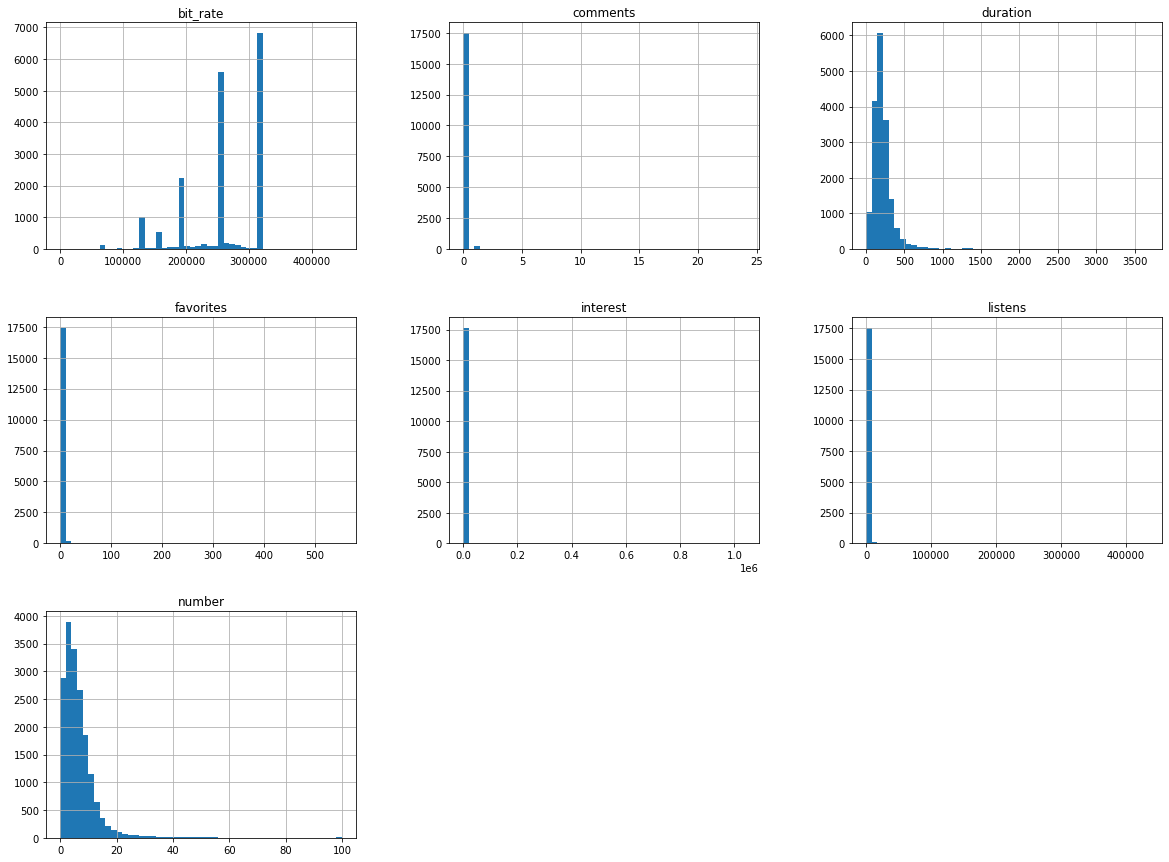

In [8]:
data.hist(bins=50, figsize=(20, 15))

In [9]:
data.corr()

bit_rate  comments  duration  favorites  interest   listens  \
bit_rate   1.000000 -0.002230  0.023969  -0.001800 -0.022650 -0.017140   
comments  -0.002230  1.000000  0.023166   0.630017  0.417699  0.412506   
duration   0.023969  0.023166  1.000000   0.008260 -0.005068 -0.004090   
favorites -0.001800  0.630017  0.008260   1.000000  0.667735  0.677138   
interest  -0.022650  0.417699 -0.005068   0.667735  1.000000  0.945520   
listens   -0.017140  0.412506 -0.004090   0.677138  0.945520  1.000000   
number     0.074227 -0.017872 -0.039274  -0.038298 -0.017139 -0.022499   

             number  
bit_rate   0.074227  
comments  -0.017872  
duration  -0.039274  
favorites -0.038298  
interest  -0.017139  
listens   -0.022499  
number     1.000000

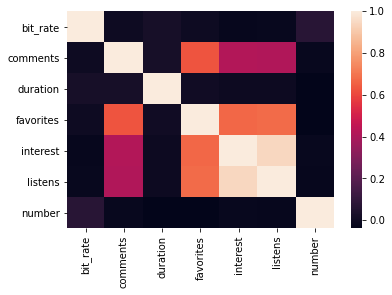

In [10]:
sns.heatmap(data.corr())

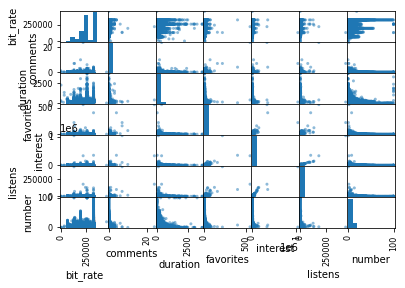

In [11]:
scatter_matrix(data)
plt.show()

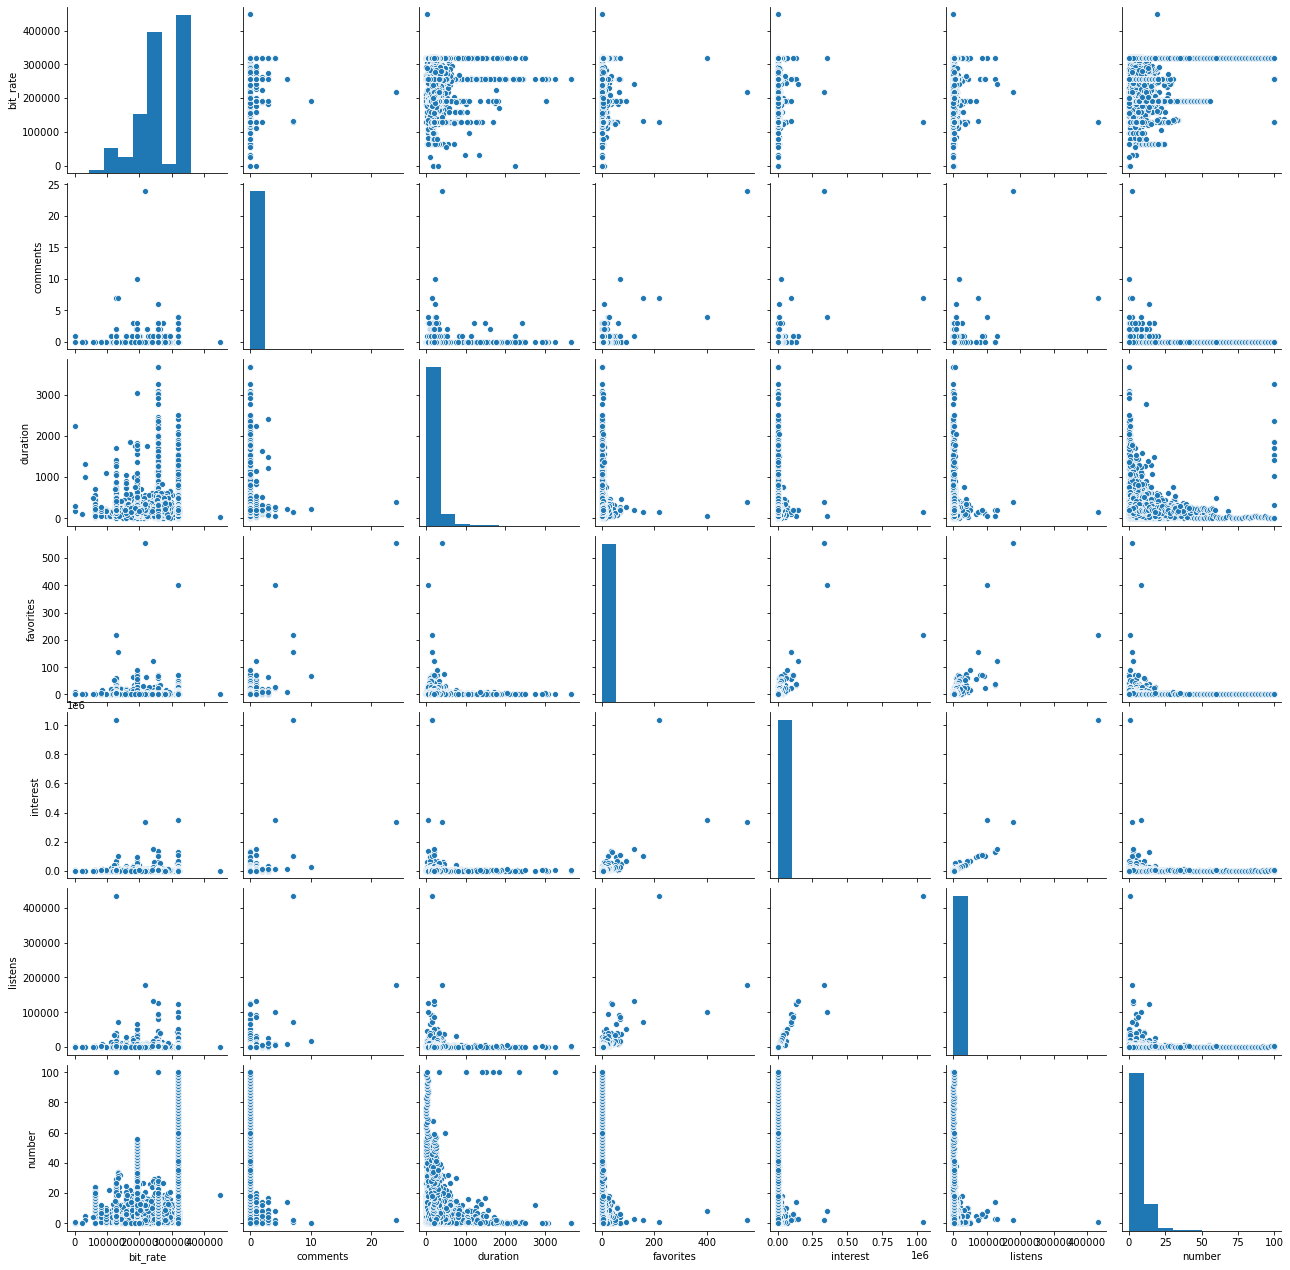

In [12]:
sns.pairplot(data)

# Labeling the features

In [13]:
x=data[['bit_rate','comments','duration','favorites','interest','listens','number']]

In [14]:
x

bit_rate  comments  duration  favorites  interest  listens  number
track_id                                                                    
135         256000         1       837          0      2484     1832       0
136         256000         1       509          0      1948     1498       0
151         192000         0       192          0       701      148       4
152         192000         0       193          0       637       98      11
153         256000         0       405          5       354      424       2
...            ...       ...       ...        ...       ...      ...     ...
155063      320000         0       283          3      1283     1050       4
155064      320000         0       250          2      1077      858       2
155065      320000         0       219          3      1340     1142       1
155066      320000         0       252          6      2065     1474       3
155247      320000         0       211          3      1379     1025       0

[17734 rows x 7 columns]

In [15]:
b=[]
b=data['genre_top']

In [16]:
y=[]

# 0 used for Hip-Hop
# 1 used for Rock

In [17]:
for i in b:
    if i=='Hip-Hop':
        y.append(0)
    elif i=='Rock':
        y.append(1)
    
    

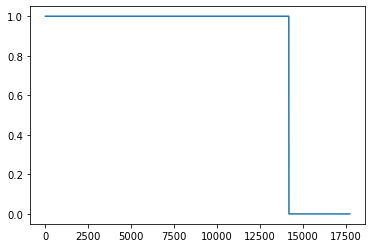

In [18]:
plt.plot(y)

## Principle Component Analysis

In [19]:
normalized_X = preprocessing.normalize(x)

[ 81.9   95.54  99.17 100.   100.  ]


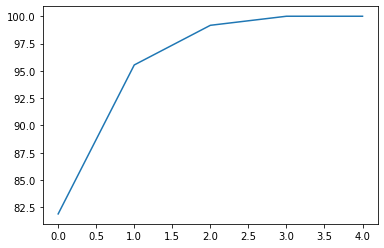

In [73]:
x=data.values

#Scaling the values
#X = scale(x)

pca = PCA(n_components=5)

pca.fit(normalized_X)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print (var1)
plt.plot(var1)


In [21]:
pca = PCA(n_components=3)
pca.fit(normalized_X)
x1=pca.fit_transform(normalized_X)

print(x1)

[[ 3.26935845e-03 -9.27879110e-04  2.65638560e-03]
 [ 9.86042566e-04 -4.90013226e-04  1.51219468e-03]
 [-4.41697156e-03  1.79435836e-03 -1.29944278e-03]
 ...
 [-2.74893035e-03  6.65384759e-04  7.87380378e-05]
 [-5.52209339e-04 -3.38101360e-04  2.22424251e-04]
 [-2.82716455e-03  7.15683885e-04 -1.93862062e-04]]


# Training the model using different Algorithms

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(x1, y, test_size=0.2, random_state=0)

# 1) Using Logistic Regression

In [23]:

model= LogisticRegression(solver='liblinear', multi_class='ovr')

In [24]:
model.fit(X_train, Y_train)


LogisticRegression(multi_class='ovr', solver='liblinear')

In [25]:
y_pred=model.predict(X_test)

### Accuracy Score of Logistic Regression Model

In [26]:
print(accuracy_score(Y_test, y_pred))

0.7933464899915421


### Confusion matrix of Logistic Regression Model

In [27]:
print(confusion_matrix(Y_test,y_pred))


[[   2  732]
 [   1 2812]]


### Classification report of Logistic Regreesion Model

In [28]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.00      0.01       734
           1       0.79      1.00      0.88      2813

    accuracy                           0.79      3547
   macro avg       0.73      0.50      0.45      3547
weighted avg       0.77      0.79      0.70      3547



### Various Analysis of Predicted Value & Actual value

In [29]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.20665351000845786
Mean Squared Error: 0.20665351000845786
Root Mean Squared Error: 0.4545915859411147


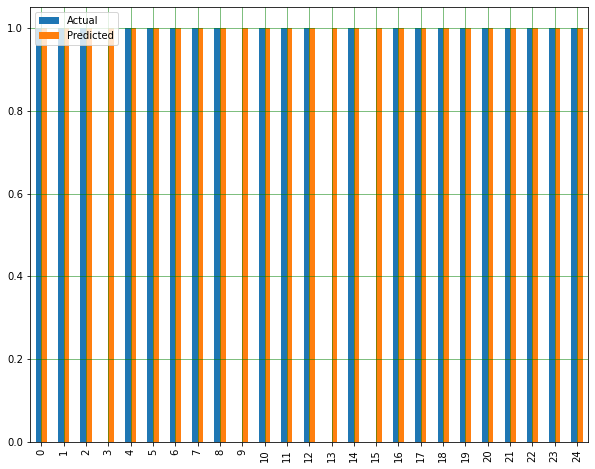

In [30]:
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df2 = df1.head(25)
df2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.show()

# 2) Using Linear Discriminant Analysis

In [31]:
model=LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)

LinearDiscriminantAnalysis()

In [32]:
y_pred=model.predict(X_test)

### Accuracy Score of Linear Discriminant Analysis Model

In [33]:
print(accuracy_score(Y_test, y_pred))

0.7927826332111644


### Confusion Matrix of Linear Discriminant Analysis Model

In [34]:
print(confusion_matrix(Y_test,y_pred))

[[   6  728]
 [   7 2806]]


### Classification Report of Linear Discriminant Analysis Model

In [35]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.01      0.02       734
           1       0.79      1.00      0.88      2813

    accuracy                           0.79      3547
   macro avg       0.63      0.50      0.45      3547
weighted avg       0.73      0.79      0.70      3547



### Various Analysis of Predicted Value & Actual value

In [36]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.20721736678883562
Mean Squared Error: 0.20721736678883562
Root Mean Squared Error: 0.4552113429922805


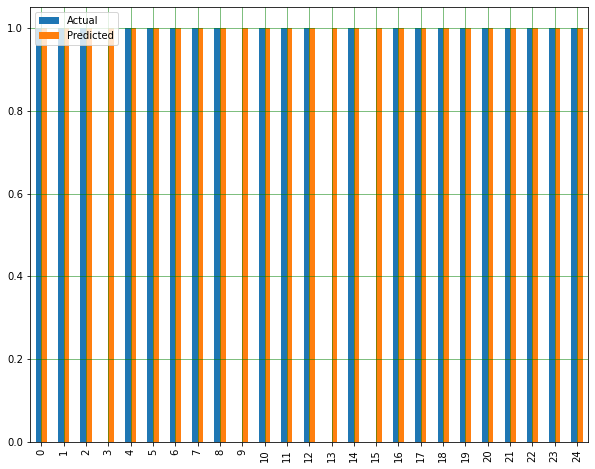

In [37]:
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df2 = df1.head(25)
df2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.show()

# 3) K Neighbors Classifier 

In [38]:

model=KNeighborsClassifier()
model.fit(X_train, Y_train)

KNeighborsClassifier()

In [39]:
y_pred=model.predict(X_test)

### Accuracy Score of K Neighbors Classifier Model

In [40]:
print(accuracy_score(Y_test, y_pred))

0.7631801522413307


### Confusion Matrix of K Neighbors Classifier Model

In [41]:
print(confusion_matrix(Y_test,y_pred))

[[  91  643]
 [ 197 2616]]


### Classification Report of K Neighbors Classifier Model

In [42]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.32      0.12      0.18       734
           1       0.80      0.93      0.86      2813

    accuracy                           0.76      3547
   macro avg       0.56      0.53      0.52      3547
weighted avg       0.70      0.76      0.72      3547



### Various Analysis of Predicted Value & Actual value

In [43]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.2368198477586693
Mean Squared Error: 0.2368198477586693
Root Mean Squared Error: 0.48664139544295787


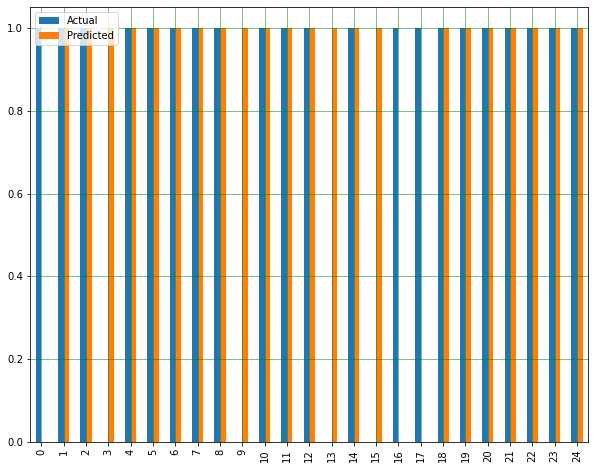

In [44]:
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df2 = df1.head(25)
df2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.show()

# 4) Decision Tree Classifier

In [45]:
model=DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

### Accuracy Score of Decision Tree Classifier Model

In [46]:
print(accuracy_score(Y_test, y_pred))

0.7631801522413307


### Confusion Matrix of Decision Tree Classifier Model

In [47]:
print(confusion_matrix(Y_test,y_pred))

[[  91  643]
 [ 197 2616]]


### Classification Report of Decision Tree Classifier Model

In [48]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.32      0.12      0.18       734
           1       0.80      0.93      0.86      2813

    accuracy                           0.76      3547
   macro avg       0.56      0.53      0.52      3547
weighted avg       0.70      0.76      0.72      3547



### Various Analysis of Predicted Value & Actual value

In [49]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.2368198477586693
Mean Squared Error: 0.2368198477586693
Root Mean Squared Error: 0.48664139544295787


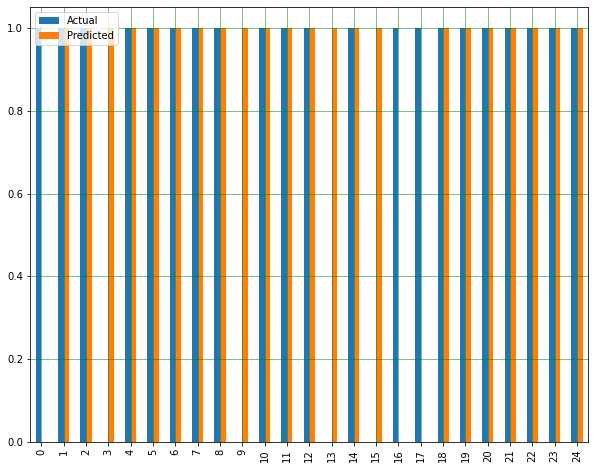

In [50]:
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df2 = df1.head(25)
df2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.show()

# 5) Support Vector Machine(SVM) Classification

In [51]:
model = SVC(gamma='auto')
model.fit(X_train, Y_train)

SVC(gamma='auto')

### Accuracy Score of SVM Model

In [52]:
print(accuracy_score(Y_test, y_pred))

0.7631801522413307


### Confusion Matrix of SVM Model

In [53]:
print(confusion_matrix(Y_test,y_pred))

[[  91  643]
 [ 197 2616]]


### Classification Report of SVM Model

In [54]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.32      0.12      0.18       734
           1       0.80      0.93      0.86      2813

    accuracy                           0.76      3547
   macro avg       0.56      0.53      0.52      3547
weighted avg       0.70      0.76      0.72      3547



### Various Analysis of Predicted Value & Actual value

In [55]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.2368198477586693
Mean Squared Error: 0.2368198477586693
Root Mean Squared Error: 0.48664139544295787


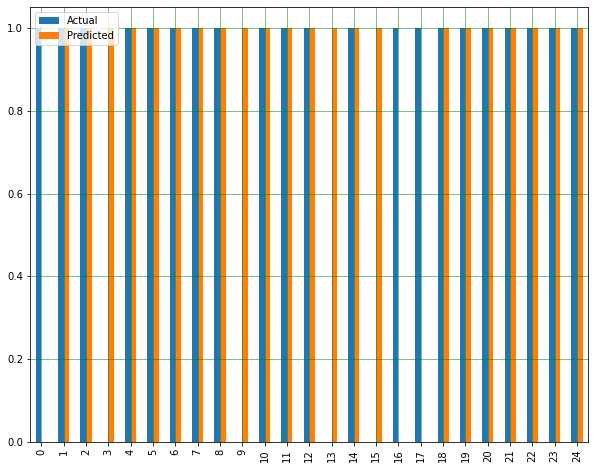

In [56]:
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df2 = df1.head(25)
df2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.show()

# 6) Gaussian NB Classifier

In [57]:
model=GaussianNB()
model.fit(X_train, Y_train)

GaussianNB()

### Accuracy Score of Gaussian NB Model

In [58]:
print(accuracy_score(Y_test, y_pred))

0.7631801522413307


### Confusion Matrix of Gaussian NB Model

In [59]:
print(confusion_matrix(Y_test,y_pred))

[[  91  643]
 [ 197 2616]]


### Classification Report of Gaussian NB Model

In [60]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.32      0.12      0.18       734
           1       0.80      0.93      0.86      2813

    accuracy                           0.76      3547
   macro avg       0.56      0.53      0.52      3547
weighted avg       0.70      0.76      0.72      3547



### Various Analysis of Predicted Value & Actual value

In [61]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.2368198477586693
Mean Squared Error: 0.2368198477586693
Root Mean Squared Error: 0.48664139544295787


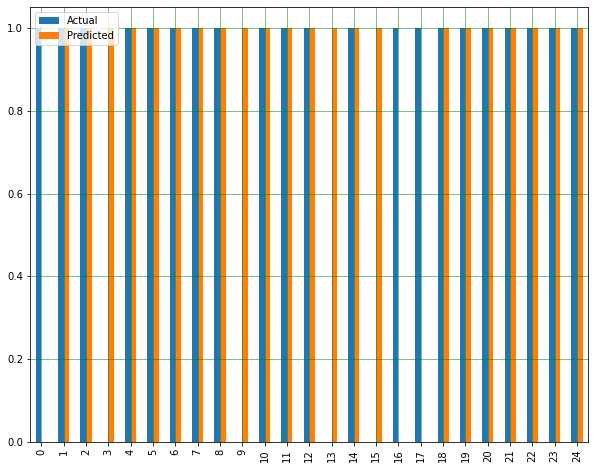

In [62]:
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df2 = df1.head(25)
df2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.show()

# Evaluating Each Model on Turn

In [63]:
models = []

In [64]:
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNC', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('GNB', GaussianNB()))


In [65]:
results = []
names = []

In [66]:
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.801297 (0.000843)
LDA: 0.800874 (0.001973)
KNC: 0.767534 (0.008238)
DTC: 0.690069 (0.013065)
SVM: 0.801367 (0.000237)
GNB: 0.800451 (0.002716)
